In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from CartPole_ import CartPole
from CartPoleNoise_ import CartPoleGaussianNoisyDyn, CartPoleGaussianNoisyObs, CartPoleGaussianNoisyObsDyn

matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
    'image.cmap':'jet'
})

from NonLinearObserver_ import NonLinearObserver
from LinearController_ import LinearController

from shared import get_initial_states, plot_rollout, np_to_string, get_scan_states_ranges, plot_actual_and_predicted_states_contour

In [31]:
# Task 3.2

In [32]:
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
model_3_2 = NonLinearObserver.initialize_model(N=14, M=9, with_action=True)
model_3_2.load_model("./models/3_2__14__9")

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

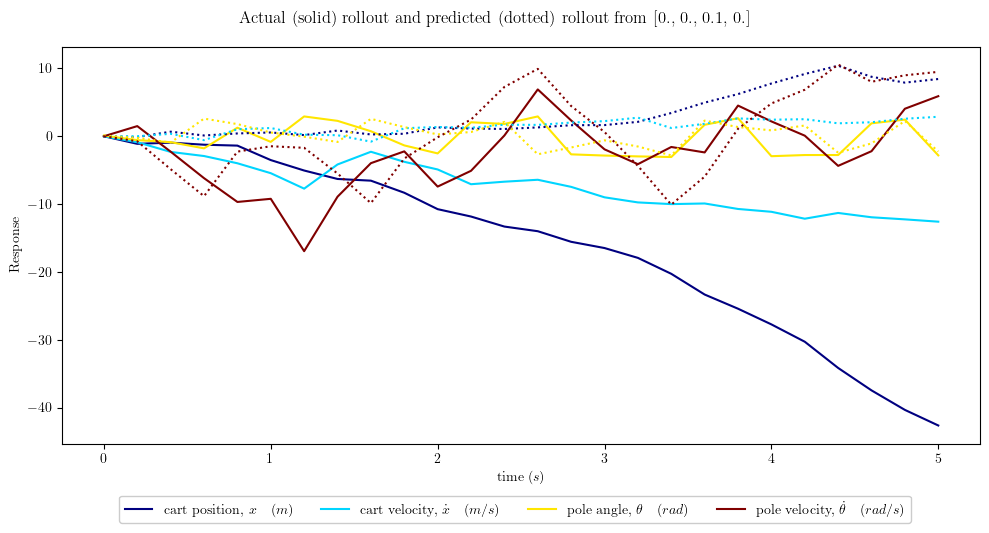

In [33]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_2.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)

lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

Text(0.5, 0.98, 'Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]')

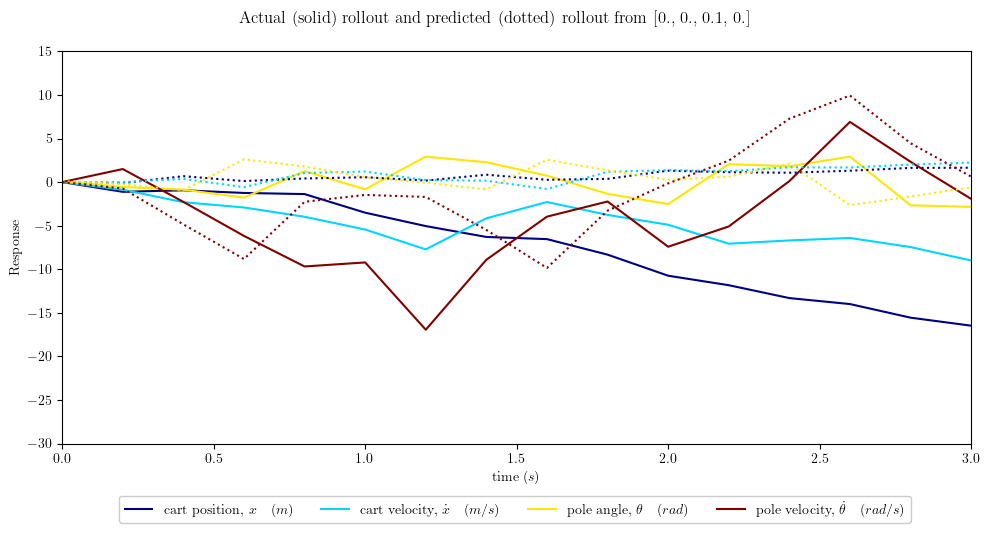

In [34]:
from shared import plot_rollout_single

n = 4
colors = plt.cm.jet(np.linspace(0, 1, n))
fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')

target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
s0 = np.array([0, 0, 0.1, 0, 0])
x, y = target_no_noise.simulate(time=5, state=s0, remap=True)
x_hat, y_hat = model_3_2.simulate(time=5, state=s0, remap=True)

plot_rollout_single(x, y, ax, fig, color=colors, linestyle='solid', legend=True)
plot_rollout_single(x_hat, y_hat, ax, fig, color=colors, linestyle='dotted', legend=False)
ax.set(ylim=(-30, 15), xlim=(0, 3))
lgd = fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=4)
fig.suptitle("Actual (solid) rollout and predicted (dotted) rollout from [0., 0., 0.1, 0.]")

In [35]:
# Fit linear controller

[1.00096722 1.02418547 1.02907459 1.00509892]


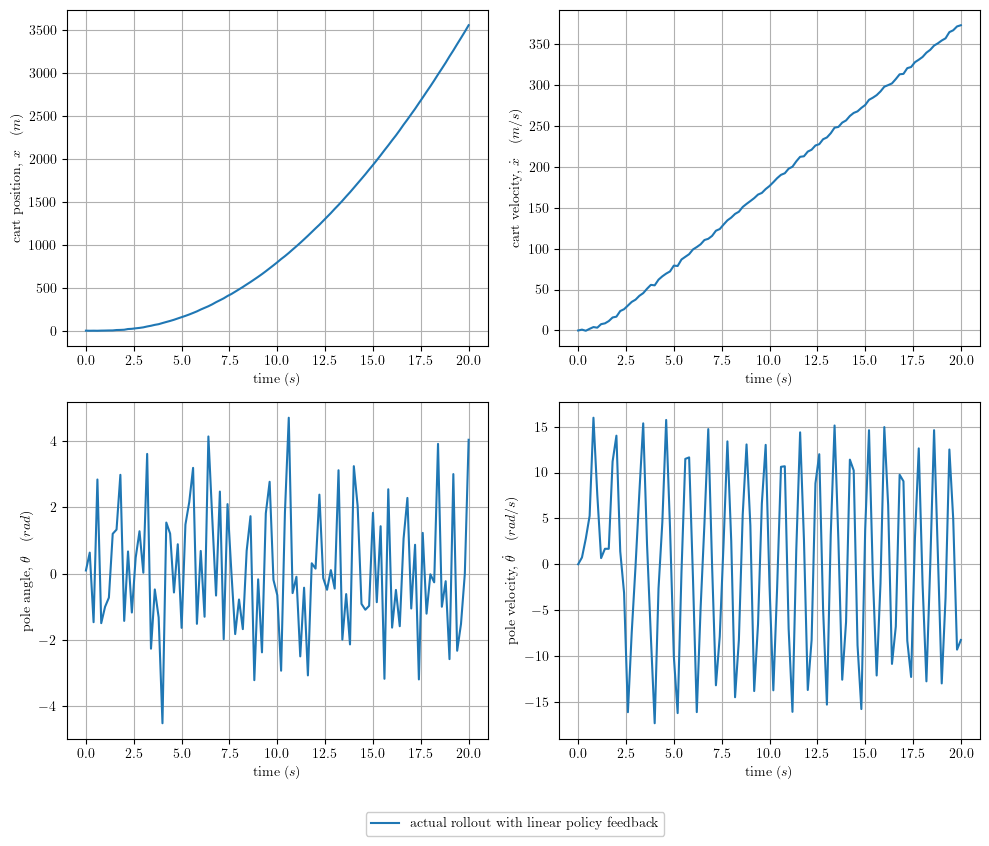

In [12]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1, 1, 1, 1])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=1, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 9.2610746   6.19446983 -3.14974783 -9.93881719]
[-2.80507224 -6.64947673  1.22738981  4.20313251]
[-7.41678314  1.0414684  -1.15882005 -4.44469519]
[ 0.08817322 -1.35435718  2.49897572  9.97091146]
[ 3.60527681  3.33683046  0.60992286 14.61864709]
[-8.74661901 -4.21129584 -2.21392349 -1.63910614]
[-1.02962234  8.65569876  1.87213843  1.81801901]
[  6.67763139  -9.37208486  -0.19288229 -14.04746839]
[ 5.84060733  2.19982901  2.05678472 -2.79682633]
[-1.65236395 -0.27618333 -0.78988928 11.28515133]
[ -8.04814076   7.24469413   0.04561664 -12.12672628]
[ 4.3226394  -5.255373   -1.98215988  2.62211757]
[ 1.97525184  9.64836927 -1.34269337  7.41022001]
[-5.52911399 -8.28962753  2.98145379 -9.10766497]
[-4.66697781  4.64357322 -2.54485409  8.55319274]
[ 7.69666769 -2.80218009  1.0358009  -7.28347316]
[ 8.69426206  4.16999593 -0.41162186  0.28785646]
[ -4.0728101   -3.06204464   2.4201178  -14.567428  ]
[-6.14792656  9.42692592 -1.67214931 13.98748595]
[ 1.58849623 -8.36477572  0.38143997 -

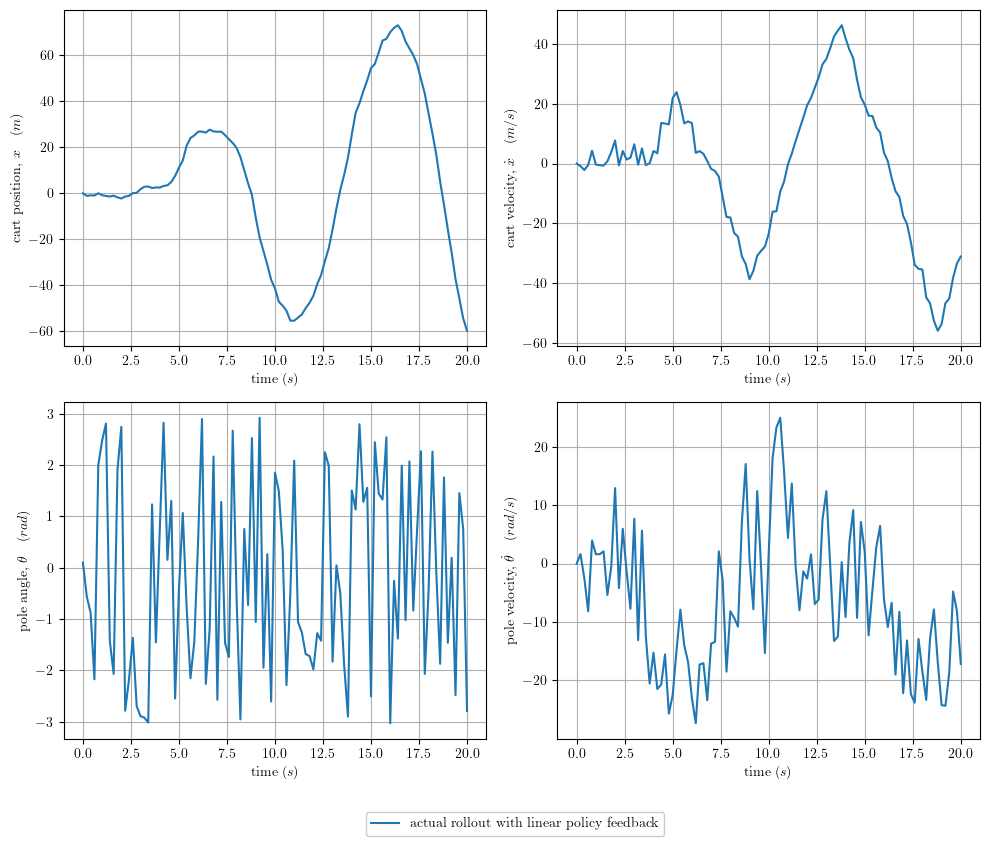

In [15]:
from optimizer import Optimizer
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False, loc=0, scale=1)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=1, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[-7.05753266  1.06831875 -1.18326392 -4.55928498]


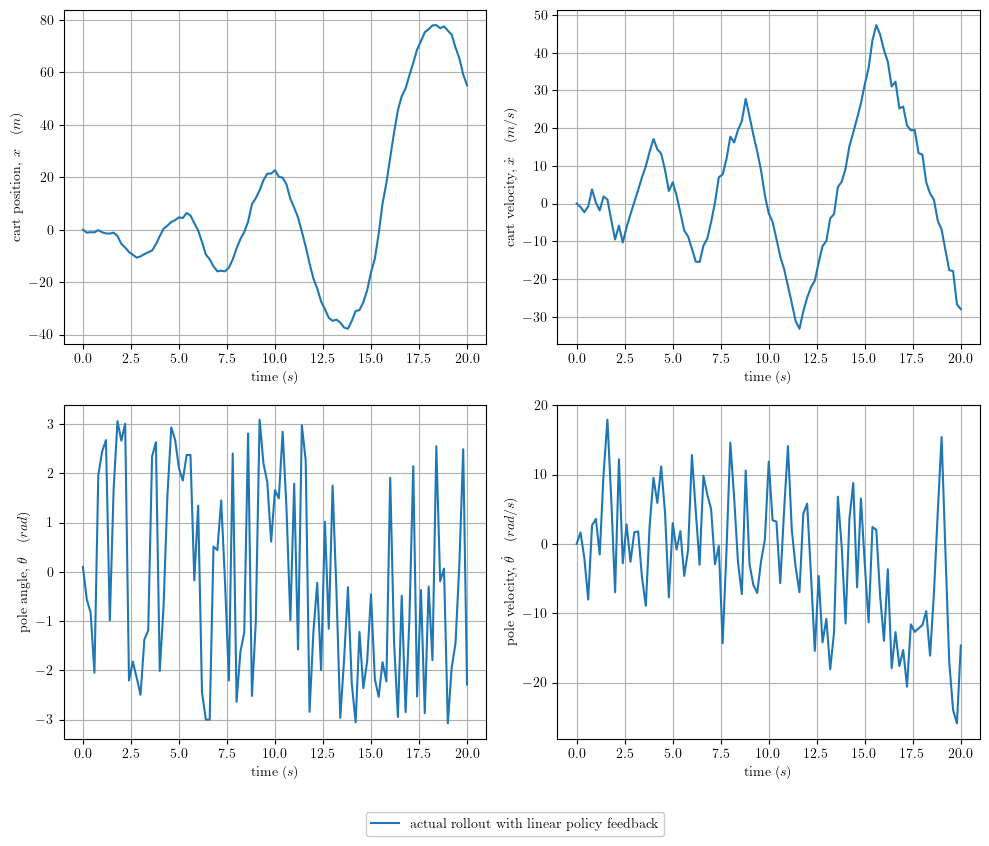

In [6]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False)
controller = LinearController.get_linear_controller()
p0 = np.array([-7.41678314,  1.0414684,  -1.15882005, -4.44469519])

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=1, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[  9.86580574   6.05722414  -3.08010072 -10.00715248]
[-2.79114882 -6.23988101  1.14399926  4.39714693]
[-7.41678472  1.04146833 -1.15881989 -4.66692956]
[ 0.09416804 -1.42020411  2.45708269  9.50212574]
[ 3.83006423  3.38192325  0.611353   14.22174015]
[-9.10592095 -4.24070543 -2.15143402 -1.68118051]
[-1.06183723  8.356931    1.82740066  1.83440942]
[  6.13370334  -9.40636567  -0.19574775 -14.53410957]
[ 6.20675344  2.33159431  2.08218194 -2.63537383]
[-1.63696702 -0.28289102 -0.75535474 11.73170933]
[ -7.98790353   7.29041383   0.04867315 -11.59825802]
[ 4.32039322 -5.51971632 -1.88734113  2.62200951]
[ 1.94092709  9.9403454  -1.32604991  7.53791634]
[-5.6586673 -7.9790244  3.1047265 -8.8786991]
[-4.52061344  4.51745883 -2.55478361  9.00118368]
[ 8.15078977 -2.73011452  0.98953783 -7.396707  ]
[ 8.62200825  4.22393125 -0.39976528  0.28538856]
[ -4.04917615  -3.33125429   2.29098341 -13.79409138]
[-5.99218646  9.19398408 -1.63197146 13.73654846]
[ 1.48492336 -8.32825161  0.38686878 -

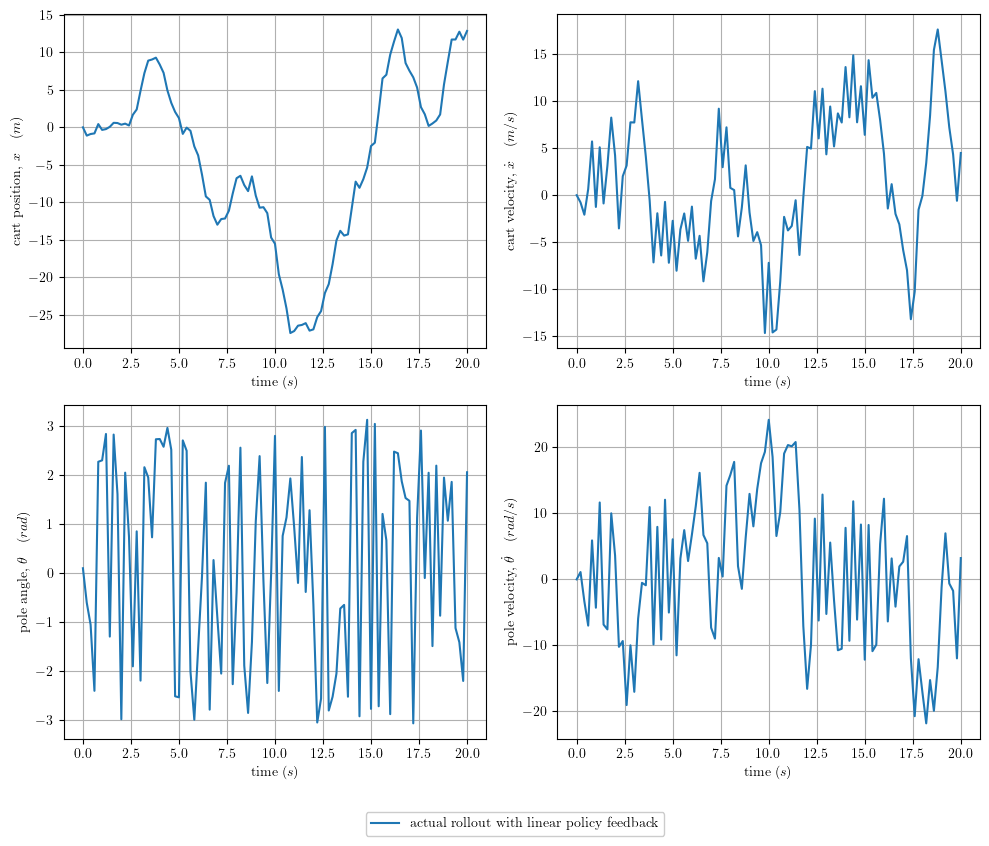

In [7]:
from optimizer import Optimizer
from shared import get_sobol_points

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False)
controller = LinearController.get_linear_controller()

sobol_points = get_sobol_points(m=5, d=4)

fig, axs = plt.subplots(2, 2, figsize=(10, 8), layout='tight')


s0 = np.array([0, 0, 0.1, 0, 0])

for p0 in sobol_points:
    p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=3, remap=True)
    print(p_opt)
    controller.p = optimizer.sol
    

print(f"final: {controller.p}")
x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=20)

plot_rollout(x_target, y_target, axs, fig, label='actual rollout with linear policy feedback')
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[-5.65852824 -8.37813006  3.10471464 -8.87866588]


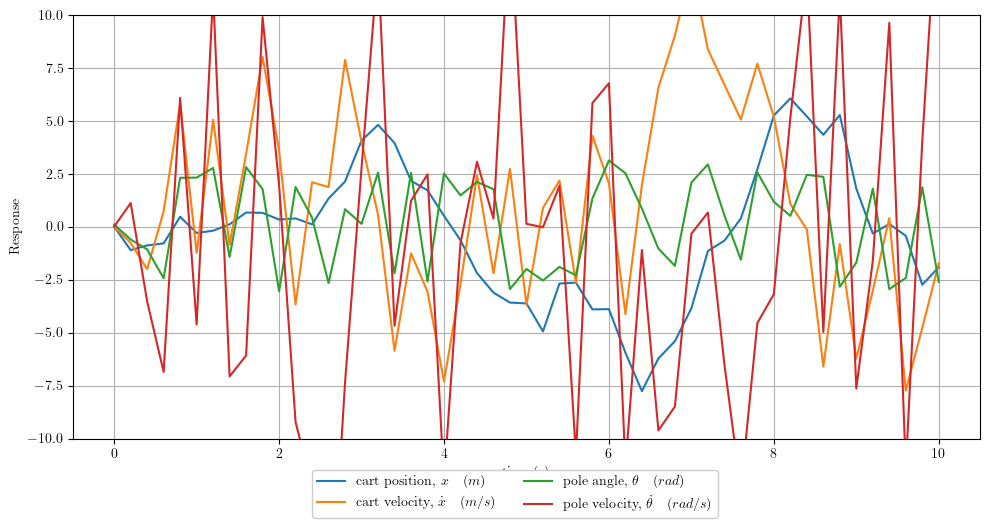

In [ ]:
from optimizer import Optimizer
from shared import plot_rollout_single

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False)
controller = LinearController.get_linear_controller()
p0 = np.array([-5.6586673, -7.9790244,  3.1047265, -8.8786991])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=2, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
ax.set(ylim=(-10, 10))
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 1.78000748  2.24372048 19.42020041  3.11099489]


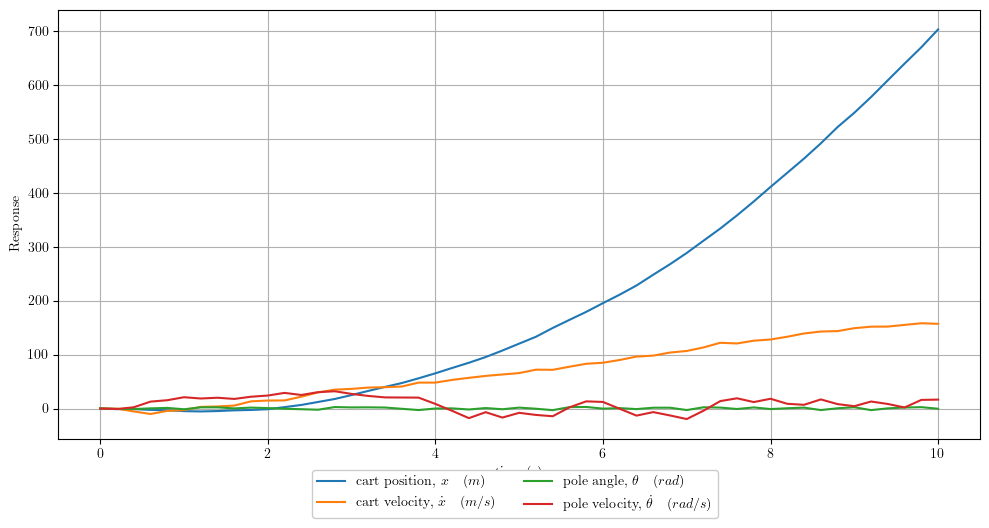

In [28]:
from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.82882224,  2.20082917, 19.37292826,  3.02057818])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)

[ 1.83299915  2.23580982 17.21719068  3.09824831]


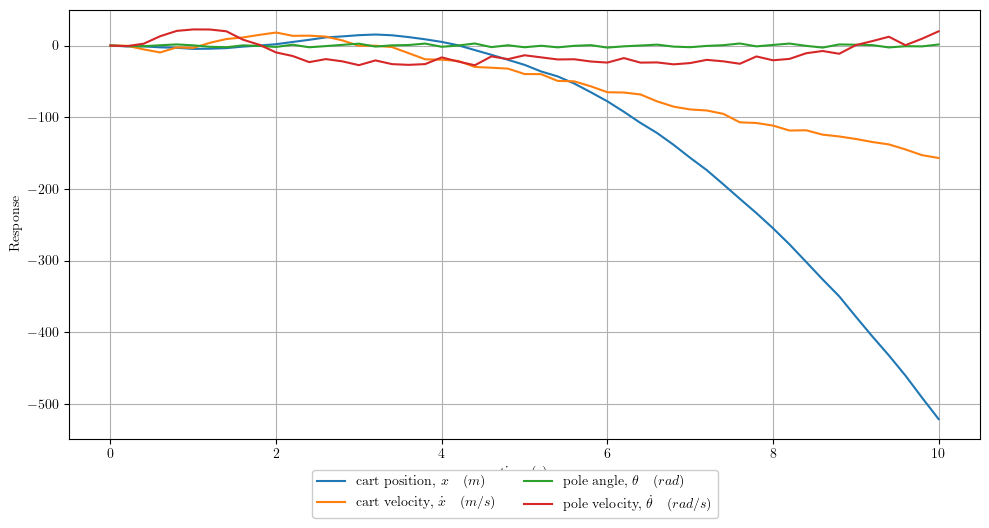

In [37]:
# from optimizer import Optimizer

optimizer = Optimizer()
target = CartPoleGaussianNoisyObs(False, loc=0, scale=1)
target_no_noise = CartPoleGaussianNoisyDyn(False)
controller = LinearController.get_linear_controller()
p0 = np.array([ 1.8,  2.2, 17.5,  3.15])

fig, ax = plt.subplots(1, 1, figsize=(10, 5), layout='tight')
s0 = np.array([0, 0, 0.1, 0, 0])

p_opt, loss = optimizer.optimize_linear(target, controller, s0, p0, verbose=False, loss_func=1, time=10, remap=True)
controller.p = p_opt
print(p_opt)

x_target, y_target = target_no_noise.simulate_with_feedback(state=s0, remap=True, controller=controller, time=10)

plot_rollout_single(x_target, y_target, ax, fig, color=[None] * 4, linestyle='solid', legend=True)
fig.legend(loc="lower center", framealpha=1, bbox_to_anchor=(0.52, -0.06), ncol=2)